In [18]:
# Import Needed Liberaries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
sns.set()
sns.set_style("whitegrid")


In [19]:
# Import our Data:
data = pd.read_csv("USD_INR.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-18,76.331398,76.456497,76.074501,76.331398,76.331398,0
1,2022-04-19,76.280197,76.561203,76.215500,76.280197,76.280197,0
2,2022-04-20,76.445396,76.656502,76.153000,76.445396,76.445396,0
3,2022-04-21,76.276199,76.366402,76.083900,76.276199,76.276199,0
4,2022-04-22,76.285202,76.746002,76.150002,76.285202,76.285202,0


In [20]:
# Sort the data from old to new date:
data = data.sort_values(by='Date', ascending=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-18,76.331398,76.456497,76.074501,76.331398,76.331398,0
1,2022-04-19,76.280197,76.561203,76.215500,76.280197,76.280197,0
2,2022-04-20,76.445396,76.656502,76.153000,76.445396,76.445396,0
3,2022-04-21,76.276199,76.366402,76.083900,76.276199,76.276199,0
4,2022-04-22,76.285202,76.746002,76.150002,76.285202,76.285202,0


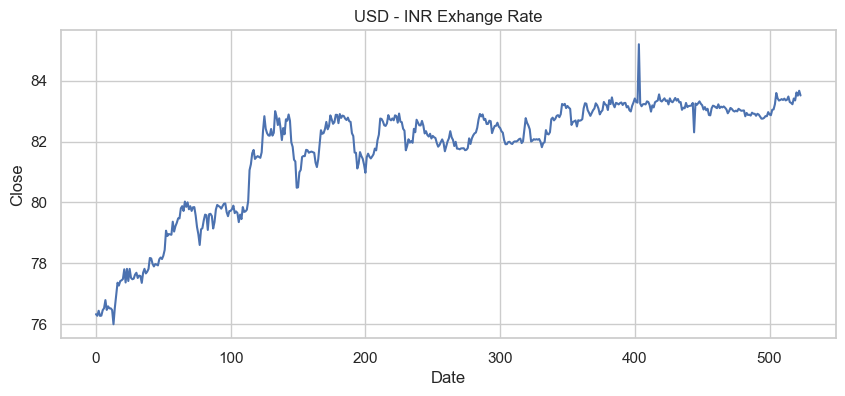

In [21]:
# Lets take a look on the close price over time:
plt.figure(figsize =(10,4))
plt.title("USD - INR Exhange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       524 non-null    object 
 1   Open       524 non-null    float64
 2   High       524 non-null    float64
 3   Low        524 non-null    float64
 4   Close      524 non-null    float64
 5   Adj Close  524 non-null    float64
 6   Volume     524 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 28.8+ KB


In [23]:
# Drop the 'date' column
df_numeric = data.drop(columns=['Date'])

# Calculate correlation
correlation = df_numeric.corr()

print(correlation)

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.993990  0.992596  0.999999   0.999999     NaN
High       0.993990  1.000000  0.989861  0.993993   0.993993     NaN
Low        0.992596  0.989861  1.000000  0.992594   0.992594     NaN
Close      0.999999  0.993993  0.992594  1.000000   1.000000     NaN
Adj Close  0.999999  0.993993  0.992594  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       524 non-null    object 
 1   Open       524 non-null    float64
 2   High       524 non-null    float64
 3   Low        524 non-null    float64
 4   Close      524 non-null    float64
 5   Adj Close  524 non-null    float64
 6   Volume     524 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 28.8+ KB


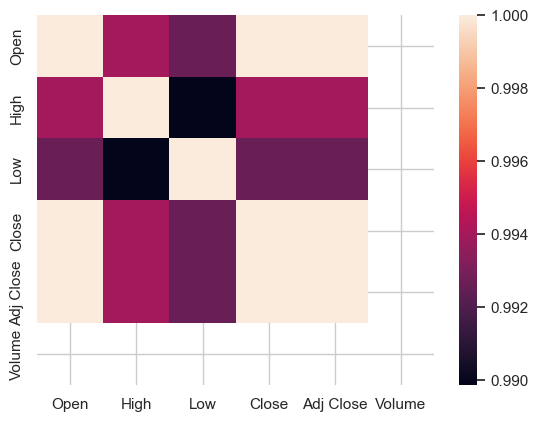

In [25]:
sns.heatmap(correlation)
plt.show()

In [26]:
# Now lets prepare our data for prediction:
x = data[['Open', 'High', 'Low']]
y = data['Close']
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1,1)

In [27]:
# Now lets build our Model of Decision Tree Regression:

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [30]:
# Now lets see the predicted values:
df = pd.DataFrame(data={"Predicted Rate" : ypred.flatten()})
df.head()

,Predicted Rate
0,81.983902
1,83.177597
2,76.472198
3,82.835297
4,79.097801
